# Embedding 

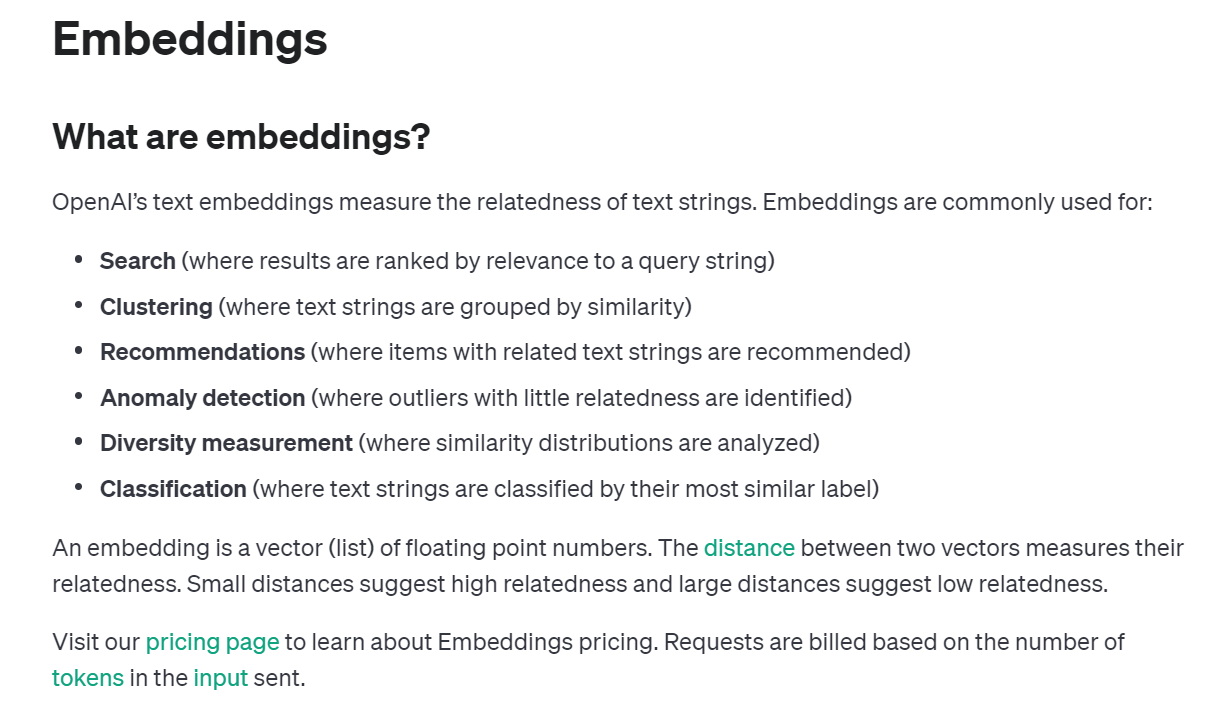

In [1]:
import openai
import os
import openai
openai.api_key = os.getenv("OPENAI_API_KEY")

In [3]:
response = openai.Embedding.create(
    input="Your text string goes here",
    model="text-embedding-ada-002"
)
embeddings = response['data'][0]['embedding']
embeddings

[-0.007021795958280563,
 -0.0052579473704099655,
 0.011873218230903149,
 -0.024888738989830017,
 -0.024579644203186035,
 0.03972522169351578,
 -0.010065694339573383,
 -0.00940719060599804,
 -0.013257419690489769,
 -0.01002537738531828,
 -0.011732110753655434,
 0.007747493218630552,
 -0.01416454091668129,
 0.007760932203382254,
 0.010280715301632881,
 -0.005053005181252956,
 0.022940106689929962,
 -0.0015496666310355067,
 0.015024627558887005,
 -0.010388226248323917,
 0.004844703245908022,
 0.01245780847966671,
 0.004844703245908022,
 0.01089218258857727,
 -0.006692544091492891,
 -0.0003231621813029051,
 0.005570400506258011,
 -0.012578757479786873,
 0.016381951048970222,
 0.0044885738752782345,
 0.006605191621929407,
 -0.00718306191265583,
 -0.015091821551322937,
 -0.006581673864275217,
 -0.018505288287997246,
 0.0041694012470543385,
 0.003178286598995328,
 -0.018975647166371346,
 0.030291153118014336,
 -0.007465277798473835,
 0.008117061108350754,
 0.009521421045064926,
 -0.0011330625

In [5]:
import pandas as pd
import tiktoken

from openai.embeddings_utils import get_embedding

In [6]:
embedding_model = "text-embedding-ada-002"
embedding_encoding = "cl100k_base"  # this the encoding for text-embedding-ada-002
max_tokens = 8000 

In [8]:
df = pd.read_csv('Reviews.csv', index_col=0)
df = df[["Time", "ProductId", "UserId", "Score", "Summary", "Text"]]
df = df.dropna()
df["combined"] = (
    "Title: " + df.Summary.str.strip() + "; Content: " + df.Text.str.strip()
)
df.head(10)

,Time,ProductId,UserId,Score,Summary,Text,combined
Id,,,,,,,
1,1303862400,B001E4KFG0,A3SGXH7AUHU8GW,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,Title: Good Quality Dog Food; Content: I have ...
2,1346976000,B00813GRG4,A1D87F6ZCVE5NK,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Title: Not as Advertised; Content: Product arr...
3,1219017600,B000LQOCH0,ABXLMWJIXXAIN,4,"""Delight"" says it all",This is a confection that has been around a fe...,"Title: ""Delight"" says it all; Content: This is..."
4,1307923200,B000UA0QIQ,A395BORC6FGVXV,2,Cough Medicine,If you are looking for the secret ingredient i...,Title: Cough Medicine; Content: If you are loo...
5,1350777600,B006K2ZZ7K,A1UQRSCLF8GW1T,5,Great taffy,Great taffy at a great price. There was a wid...,Title: Great taffy; Content: Great taffy at a ...
6,1342051200,B006K2ZZ7K,ADT0SRK1MGOEU,4,Nice Taffy,I got a wild hair for taffy and ordered this f...,Title: Nice Taffy; Content: I got a wild hair ...
7,1340150400,B006K2ZZ7K,A1SP2KVKFXXRU1,5,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,Title: Great! Just as good as the expensive b...
8,1336003200,B006K2ZZ7K,A3JRGQVEQN31IQ,5,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,"Title: Wonderful, tasty taffy; Content: This t..."
9,1322006400,B000E7L2R4,A1MZYO9TZK0BBI,5,Yay Barley,Right now I'm mostly just sprouting this so my...,Title: Yay Barley; Content: Right now I'm most...


In [9]:
# subsample to 1k most recent reviews and remove samples that are too long
top_n = 1000
df = df.sort_values("Time").tail(top_n * 2)  # first cut to first 2k entries, assuming less than half will be filtered out
df.drop("Time", axis=1, inplace=True)

encoding = tiktoken.get_encoding(embedding_encoding)

# omit reviews that are too long to embed
df["n_tokens"] = df.combined.apply(lambda x: len(encoding.encode(x)))
df = df[df.n_tokens <= max_tokens].tail(top_n)
len(df)

1000

# To load the data from a saved file, you can run the following:

In [41]:
import pandas as pd
import numpy as np


df = pd.read_csv('embedded_1k_reviews.csv')
df['embedding'] = df.embedding.apply(eval).apply(np.array)
df.head()

,Unnamed: 0,ProductId,UserId,Score,Summary,Text,combined,n_tokens,embedding
0,0,B003XPF9BO,A3R7JR3FMEBXQB,5,where does one start...and stop... with a tre...,Wanted to save some to bring to my Chicago fam...,Title: where does one start...and stop... wit...,52,"[0.007018072064965963, -0.02731654793024063, 0..."
1,297,B003VXHGPK,A21VWSCGW7UUAR,4,"Good, but not Wolfgang Puck good","Honestly, I have to admit that I expected a li...","Title: Good, but not Wolfgang Puck good; Conte...",178,"[-0.003140551969408989, -0.009995664469897747,..."
2,296,B008JKTTUA,A34XBAIFT02B60,1,Should advertise coconut as an ingredient more...,"First, these should be called Mac - Coconut ba...",Title: Should advertise coconut as an ingredie...,78,"[-0.01757248118519783, -8.266511576948687e-05,..."
3,295,B000LKTTTW,A14MQ40CCU8B13,5,Best tomato soup,I have a hard time finding packaged food of an...,Title: Best tomato soup; Content: I have a har...,111,"[-0.0013932279543951154, -0.011112828738987446..."
4,294,B001D09KAM,A34XBAIFT02B60,1,Should advertise coconut as an ingredient more...,"First, these should be called Mac - Coconut ba...",Title: Should advertise coconut as an ingredie...,78,"[-0.01757248118519783, -8.266511576948687e-05,..."


# Data visualization in 2D

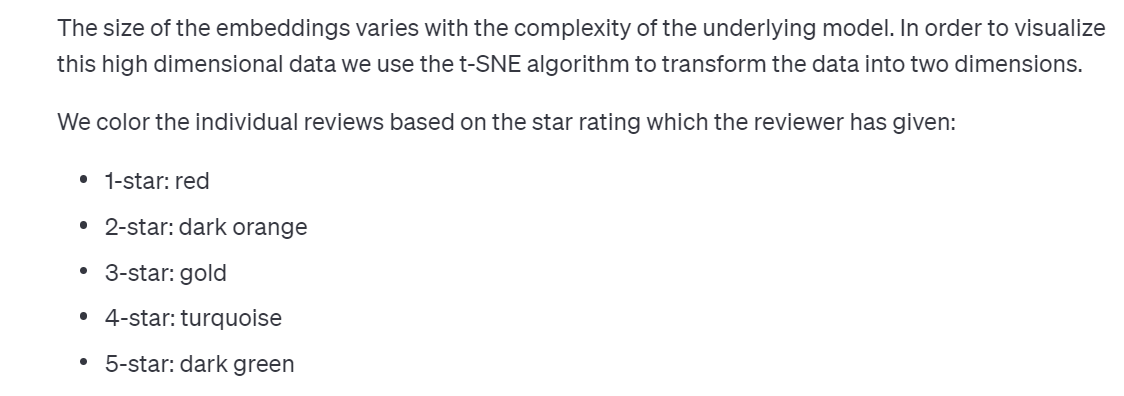

In [49]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
from ast import literal_eval

# Load the embeddings
df = pd.read_csv('embedded_1k_reviews.csv')

# Convert to a list of lists of floats
matrix = np.array(df.embedding.apply(literal_eval).to_list())

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)
vis_dims.shape

(1000, 2)

# Plot the Graph

Text(0.5, 1.0, 'Amazon ratings visualized in language using t-SNE')

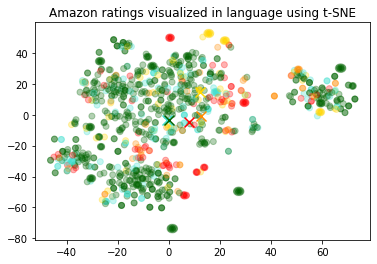

In [50]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

colors = ["red", "darkorange", "gold", "turquoise", "darkgreen"]
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]
color_indices = df.Score.values - 1

colormap = matplotlib.colors.ListedColormap(colors)
plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)
for score in [0,1,2,3,4]:
    avg_x = np.array(x)[df.Score-1==score].mean()
    avg_y = np.array(y)[df.Score-1==score].mean()
    color = colors[score]
    plt.scatter(avg_x, avg_y, marker='x', color=color, s=100)

plt.title("Amazon ratings visualized in language using t-SNE")

# Embedding as a text feature encoder for ML algorithms


An embedding can be used as a general free-text feature encoder within a machine learning model. Incorporating embeddings will improve the performance of any machine learning model, if some of the relevant inputs are free text. An embedding can also be used as a categorical feature encoder within a ML model. This adds most value if the names of categorical variables are meaningful and numerous, such as job titles. Similarity embeddings generally perform better than search embeddings for this task.

We observed that generally the embedding representation is very rich and information dense. For example, reducing the dimensionality of the inputs using SVD or PCA, even by 10%, generally results in worse downstream performance on specific tasks.

This code splits the data into a training set and a testing set, which will be used by the following two use cases, namely regression and classification.

Regression using the embedding features
Embeddings present an elegant way of predicting a numerical value. In this example we predict the reviewer’s star rating, based on the text of their review. Because the semantic information contained within embeddings is high, the prediction is decent even with very few reviews.

We assume the score is a continuous variable between 1 and 5, and allow the algorithm to predict any floating point value. The ML algorithm minimizes the distance of the predicted value to the true score, and achieves a mean absolute error of 0.39, which means that on average the prediction is off by less than half a star.

In [53]:
import pandas as pd
import numpy as np
from ast import literal_eval

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


df = pd.read_csv('embedded_1k_reviews.csv')
df["embedding"] = df.embedding.apply(literal_eval).apply(np.array)

X_train, X_test, y_train, y_test = train_test_split(list(df.embedding.values), df.Score, test_size=0.2, random_state=42)

rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)
preds = rfr.predict(X_test)

mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)

print(f"ada-002 embedding performance on 1k Amazon reviews: mse={mse:.2f}, mae={mae:.2f}")

ada-002 embedding performance on 1k Amazon reviews: mse=0.60, mae=0.53


In [54]:
bmse = mean_squared_error(y_test, np.repeat(y_test.mean(), len(y_test)))
bmae = mean_absolute_error(y_test, np.repeat(y_test.mean(), len(y_test)))
print(
    f"Dummy mean prediction performance on Amazon reviews: mse={bmse:.2f}, mae={bmae:.2f}"
)

Dummy mean prediction performance on Amazon reviews: mse=1.73, mae=1.03


We can see that the embeddings are able to predict the scores with an average error of 0.53 per score prediction. This is roughly equivalent to predicting half of reviews perfectly, and half off by one star.

You could also train a classifier to predict the label, or use the embeddings within an existing ML model to encode free text features.

# Classification using the embedding features

 instead of having the algorithm predict a value anywhere between 1 and 5, we will attempt to classify the exact number of stars for a review into 5 buckets, ranging from 1 to 5 stars.

After the training, the model learns to predict 1 and 5-star reviews much better than the more nuanced reviews (2-4 stars), likely due to more extreme sentiment expression.

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    list(df.embedding.values), df.Score, test_size=0.2, random_state=42
)

# train random forest classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
probas = clf.predict_proba(X_test)

report = classification_report(y_test, preds)
print(report)

              precision    recall  f1-score   support

           1       0.88      0.35      0.50        20
           2       1.00      0.38      0.55         8
           3       1.00      0.18      0.31        11
           4       1.00      0.26      0.41        27
           5       0.74      1.00      0.85       134

    accuracy                           0.77       200
   macro avg       0.92      0.43      0.52       200
weighted avg       0.82      0.77      0.72       200



We can see that the model has learnt to distinguish between the categories decently. 5-star reviews show the best performance overall, and this is not too surprising, since they are the most common in the dataset.

RandomForestClassifier() - Average precision score over all classes: 0.88


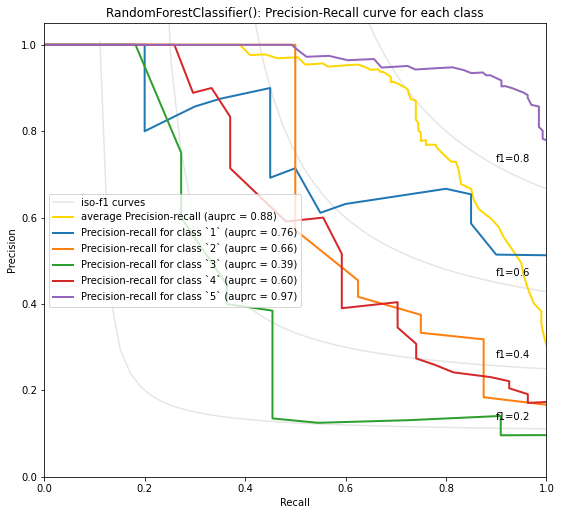

In [56]:
from openai.embeddings_utils import plot_multiclass_precision_recall

plot_multiclass_precision_recall(probas, y_test, [1, 2, 3, 4, 5], clf)

Unsurprisingly 5-star and 1-star reviews seem to be easier to predict. Perhaps with more data, the nuances between 2-4 stars could be better predicted, but there's also probably more subjectivity in how people use the inbetween scores.

# Zero-shot classification with embeddings

To perform zero shot classification, we want to predict labels for our samples without any training. To do this, we can simply embed short descriptions of each label, such as positive and negative, and then compare the cosine distance between embeddings of samples and label descriptions.

The highest similarity label to the sample input is the predicted label. We can also define a prediction score to be the difference between the cosine distance to the positive and to the negative label. This score can be used for plotting a precision-recall curve, which can be used to select a different tradeoff between precision and recall, by selecting a different threshold.

In [59]:
from sklearn.metrics import classification_report

# parameters
EMBEDDING_MODEL = "text-embedding-ada-002"



df = pd.read_csv('embedded_1k_reviews.csv')
df["embedding"] = df.embedding.apply(literal_eval).apply(np.array)

# convert 5-star rating to binary sentiment
df = df[df.Score != 3]
df["sentiment"] = df.Score.replace({1: "negative", 2: "negative", 4: "positive", 5: "positive"})

              precision    recall  f1-score   support

    negative       0.61      0.88      0.72       136
    positive       0.98      0.90      0.94       789

    accuracy                           0.90       925
   macro avg       0.79      0.89      0.83       925
weighted avg       0.92      0.90      0.91       925



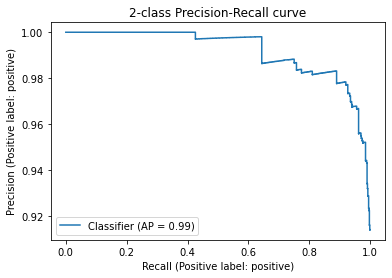

In [60]:
from openai.embeddings_utils import cosine_similarity, get_embedding
from sklearn.metrics import PrecisionRecallDisplay

def evaluate_embeddings_approach(
    labels = ['negative', 'positive'], 
    model = EMBEDDING_MODEL,
):
    label_embeddings = [get_embedding(label, engine=model) for label in labels]

    def label_score(review_embedding, label_embeddings):
        return cosine_similarity(review_embedding, label_embeddings[1]) - cosine_similarity(review_embedding, label_embeddings[0])

    probas = df["embedding"].apply(lambda x: label_score(x, label_embeddings))
    preds = probas.apply(lambda x: 'positive' if x>0 else 'negative')

    report = classification_report(df.sentiment, preds)
    print(report)

    display = PrecisionRecallDisplay.from_predictions(df.sentiment, probas, pos_label='positive')
    _ = display.ax_.set_title("2-class Precision-Recall curve")

evaluate_embeddings_approach(labels=['negative', 'positive'], model=EMBEDDING_MODEL)

We can see that this classifier already performs extremely well. We used similarity embeddings, and the simplest possible label name. Let's try to improve on this by using more descriptive label names, and search embeddings.

              precision    recall  f1-score   support

    negative       0.98      0.73      0.84       136
    positive       0.96      1.00      0.98       789

    accuracy                           0.96       925
   macro avg       0.97      0.86      0.91       925
weighted avg       0.96      0.96      0.96       925



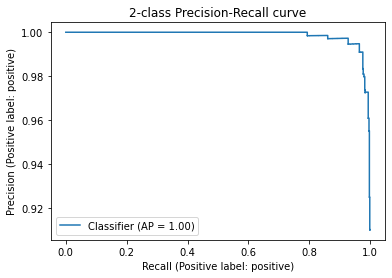

In [61]:
evaluate_embeddings_approach(labels=['An Amazon review with a negative sentiment.', 'An Amazon review with a positive sentiment.'])



As shown above, zero-shot classification with embeddings can lead to great results, especially when the labels are more descriptive than just simple words.

# user and product embeddings for cold-start recommendation

In [65]:

df = pd.read_csv('embedded_1k_reviews.csv', index_col=0)  # note that you will need to generate this file to run the code below
#df['babbage_similarity'] = df.babbage_similarity.apply(literal_eval).apply(np.array)
df["embedding"] = df.embedding.apply(literal_eval).apply(np.array)
X_train, X_test, y_train, y_test = train_test_split(df, df.Score, test_size = 0.2, random_state=42)

user_embeddings = X_train.groupby('UserId').embedding.apply(np.mean)
prod_embeddings = X_train.groupby('ProductId').embedding.apply(np.mean)
len(user_embeddings), len(prod_embeddings)

(577, 706)

# 2. Evaluate the embeddings
To evaluate the recommendations, we look at the similarity of the user and product embeddings amongst the reviews in the unseen test set. We calculate the cosine distance between the user and product embeddings, which gives us a similarity score between 0 and 1. We then normalize the scores to be evenly split between 0 and 1, by calculating the percentile of the similarity score amongst all predicted scores.

In [66]:
from openai.embeddings_utils import cosine_similarity

# evaluate embeddings as recommendations on X_test
def evaluate_single_match(row):
    user_id = row.UserId
    product_id = row.ProductId
    try:
        user_embedding = user_embeddings[user_id]
        product_embedding = prod_embeddings[product_id]
        similarity = cosine_similarity(user_embedding, product_embedding)
        return similarity
    except Exception as e:
        return np.nan

X_test['cosine_similarity'] = X_test.apply(evaluate_single_match, axis=1)
X_test['percentile_cosine_similarity'] = X_test.cosine_similarity.rank(pct=True)


# 2.1 Visualize cosine similarity by review score
We group the cosine similarity scores by the review score, and plot the distribution of cosine similarity scores for each review score.

Correlation between user & vector similarity percentile metric and review number of stars (score): 17.25%


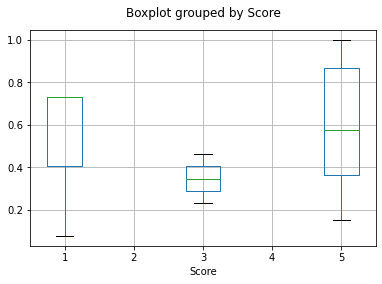

In [67]:
import matplotlib.pyplot as plt
import statsmodels.api as sm


correlation = X_test[['percentile_cosine_similarity', 'Score']].corr().values[0,1]
print('Correlation between user & vector similarity percentile metric and review number of stars (score): %.2f%%' % (100*correlation))

# boxplot of cosine similarity for each score
X_test.boxplot(column='percentile_cosine_similarity', by='Score')
plt.title('')
plt.show()
plt.close()

We can observe a weak trend, showing that the higher the similarity score between the user and the product embedding, the higher the review score. Therefore, the user and product embeddings can weakly predict the review score - even before the user receives the product!

Because this signal works in a different way than the more commonly used collaborative filtering, it can act as an additional feature to slightly improve the performance on existing problems.

# Clustering

In [68]:
matrix = np.vstack(df.embedding.values)
matrix.shape

(1000, 1536)

In [69]:
from sklearn.cluster import KMeans

n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
kmeans.fit(matrix)
labels = kmeans.labels_
df["Cluster"] = labels

df.groupby("Cluster").Score.mean().sort_values()

Cluster
0    4.105691
1    4.191176
2    4.215613
3    4.306590
Name: Score, dtype: float64

Text(0.5, 1.0, 'Clusters identified visualized in language 2d using t-SNE')

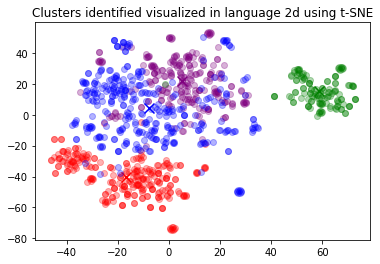

In [70]:
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=15, random_state=42, init="random", learning_rate=200)
vis_dims2 = tsne.fit_transform(matrix)

x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]

for category, color in enumerate(["purple", "green", "red", "blue"]):
    xs = np.array(x)[df.Cluster == category]
    ys = np.array(y)[df.Cluster == category]
    plt.scatter(xs, ys, color=color, alpha=0.3)

    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker="x", color=color, s=100)
plt.title("Clusters identified visualized in language 2d using t-SNE")

# 2. Text samples in the clusters & naming the clusters
Let's show random samples from each cluster. We'll use text-davinci-003 to name the clusters, based on a random sample of 5 reviews from that cluster.

In [71]:
import openai

# Reading a review which belong to each group.
rev_per_cluster = 5

for i in range(n_clusters):
    print(f"Cluster {i} Theme:", end=" ")

    reviews = "\n".join(
        df[df.Cluster == i]
        .combined.str.replace("Title: ", "")
        .str.replace("\n\nContent: ", ":  ")
        .sample(rev_per_cluster, random_state=42)
        .values
    )
    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=f'What do the following customer reviews have in common?\n\nCustomer reviews:\n"""\n{reviews}\n"""\n\nTheme:',
        temperature=0,
        max_tokens=64,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0,
    )
    print(response["choices"][0]["text"].replace("\n", ""))

    sample_cluster_rows = df[df.Cluster == i].sample(rev_per_cluster, random_state=42)
    for j in range(rev_per_cluster):
        print(sample_cluster_rows.Score.values[j], end=", ")
        print(sample_cluster_rows.Summary.values[j], end=":   ")
        print(sample_cluster_rows.Text.str[:70].values[j])

    print("-" * 100)

Cluster 0 Theme:  All of the reviews are positive and the customers are satisfied with the product they purchased.
5, Loved these gluten free healthy bars, saved $$ ordering on Amazon:   These Kind Bars are so good and healthy & gluten free.  My daughter ca
1, Should advertise coconut as an ingredient more prominently:   First, these should be called Mac - Coconut bars, as Coconut is the #2
5, very good!!:   just like the runts<br />great flavor, def worth getting<br />I even o
5, Excellent product:   After scouring every store in town for orange peels and not finding an
5, delicious:   Gummi Frogs have been my favourite candy that I have ever tried. of co
----------------------------------------------------------------------------------------------------
Cluster 1 Theme:  All of the reviews are about pet food.
2, Messy and apparently undelicious:   My cat is not a huge fan. Sure, she'll lap up the gravy, but leaves th
4, The cats like it:   My 7 cats like this food but it is a little 

RateLimitError: Rate limit reached for text-davinci-003 in organization org-wD3e3sPla56GzVtqn8K9CYSa on requests per min. Limit: 3 / min. Please try again in 20s. Visit https://platform.openai.com/account/rate-limits to learn more. You can increase your rate limit by adding a payment method to your account at https://platform.openai.com/account/billing.

It's important to note that clusters will not necessarily match what you intend to use them for. A larger amount of clusters will focus on more specific patterns, whereas a small number of clusters will usually focus on largest discrepencies in the da

# Semantic text search using embeddings

In [72]:
from openai.embeddings_utils import get_embedding, cosine_similarity

# search through the reviews for a specific product
def search_reviews(df, product_description, n=3, pprint=True):
    product_embedding = get_embedding(
        product_description,
        engine="text-embedding-ada-002"
    )
    df["similarity"] = df.embedding.apply(lambda x: cosine_similarity(x, product_embedding))

    results = (
        df.sort_values("similarity", ascending=False)
        .head(n)
        .combined.str.replace("Title: ", "")
        .str.replace("; Content:", ": ")
    )
    if pprint:
        for r in results:
            print(r[:200])
            print()
    return results


results = search_reviews(df, "delicious beans", n=3)

Good Buy:  I liked the beans. They were vacuum sealed, plump and moist. Would recommend them for any use. I personally split and stuck them in some vodka to make vanilla extract. Yum!

Jamaican Blue beans:  Excellent coffee bean for roasting. Our family just purchased another 5 pounds for more roasting. Plenty of flavor and mild on acidity when roasted to a dark brown bean and befor

Delicious!:  I enjoy this white beans seasoning, it gives a rich flavor to the beans I just love it, my mother in law didn't know about this Zatarain's brand and now she is traying different seasoning



In [73]:
results = search_reviews(df, "whole wheat pasta", n=3)

Tasty and Quick Pasta:  Barilla Whole Grain Fusilli with Vegetable Marinara is tasty and has an excellent chunky vegetable marinara.  I just wish there was more of it.  If you aren't starving or on a 

sooo good:  tastes so good. Worth the money. My boyfriend hates wheat pasta and LOVES this. cooks fast tastes great.I love this brand and started buying more of their pastas. Bulk is best.

Handy:  Love the idea of ready in a minute pasta and for that alone this product gets praise.  The pasta is whole grain so that's a big plus and it actually comes out al dente.  The vegetable marinara



In [74]:
results = search_reviews(df, "bad delivery", n=1)

great product, poor delivery:  The coffee is excellent and I am a repeat buyer.  Problem this time was with the UPS delivery.  They left the box in front of my garage door in the middle of the drivewa



In [75]:
results = search_reviews(df, "spoilt", n=1)

Extremely dissapointed:  Hi,<br />I am very disappointed with the past shipment I received of the ONE coconut water. 3 of the boxes were leaking and the coconut water was spoiled.<br /><br />Thanks.<b



In [76]:
results = search_reviews(df, "pet food", n=2)

Good food:  The only dry food my queen cat will eat. Helps prevent hair balls. Good packaging. Arrives promptly. Recommended by a friend who sells pet food.

The cats like it:  My 7 cats like this food but it is a little yucky for the human. Pieces of mackerel swimming in a dark broth. It is billed as a "complete" food and contains carrots, peas and pasta.



# Recommendation using embeddings and nearest neighbor search

1. Imports
First, let's import the packages and functions we'll need for later. If you don't have these, you'll need to install them. You can install them via your terminal by running 

In [77]:
# imports
import pandas as pd
import pickle

from openai.embeddings_utils import (
    get_embedding,
    distances_from_embeddings,
    tsne_components_from_embeddings,
    chart_from_components,
    indices_of_nearest_neighbors_from_distances,
)

# constants
EMBEDDING_MODEL = "text-embedding-ada-002"

In [78]:
# # load data (full dataset available at http://groups.di.unipi.it/~gulli/AG_corpus_of_news_articles.html)
# dataset_path = "data/AG_news_samples.csv"
df = pd.read_csv('AG_news_samples.csv')

# print dataframe
n_examples = 5
df.head(n_examples)

,title,description,label_int,label
0,World Briefings,BRITAIN: BLAIR WARNS OF CLIMATE THREAT Prime M...,1,World
1,Nvidia Puts a Firewall on a Motherboard (PC Wo...,PC World - Upcoming chip set will include buil...,4,Sci/Tech
2,"Olympic joy in Greek, Chinese press",Newspapers in Greece reflect a mixture of exhi...,2,Sports
3,U2 Can iPod with Pictures,"SAN JOSE, Calif. -- Apple Computer (Quote, Cha...",4,Sci/Tech
4,The Dream Factory,"Any product, any shape, any size -- manufactur...",4,Sci/Tech


# Let's take a look at those same examples, but not truncated by ellipses.

In [79]:
# print the title, description, and label of each example
for idx, row in df.head(n_examples).iterrows():
    print("")
    print(f"Title: {row['title']}")
    print(f"Description: {row['description']}")
    print(f"Label: {row['label']}")


Title: World Briefings
Description: BRITAIN: BLAIR WARNS OF CLIMATE THREAT Prime Minister Tony Blair urged the international community to consider global warming a dire threat and agree on a plan of action to curb the  quot;alarming quot; growth of greenhouse gases.
Label: World

Title: Nvidia Puts a Firewall on a Motherboard (PC World)
Description: PC World - Upcoming chip set will include built-in security features for your PC.
Label: Sci/Tech

Title: Olympic joy in Greek, Chinese press
Description: Newspapers in Greece reflect a mixture of exhilaration that the Athens Olympics proved successful, and relief that they passed off without any major setback.
Label: Sports

Title: U2 Can iPod with Pictures
Description: SAN JOSE, Calif. -- Apple Computer (Quote, Chart) unveiled a batch of new iPods, iTunes software and promos designed to keep it atop the heap of digital music players.
Label: Sci/Tech

Title: The Dream Factory
Description: Any product, any shape, any size -- manufactured o

# 3. Build cache to save embeddings
Before getting embeddings for these articles, let's set up a cache to save the embeddings we generate. In general, it's a good idea to save your embeddings so you can re-use them later. If you don't save them, you'll pay again each time you compute them again.

The cache is a dictionary that maps tuples of (text, model) to an embedding, which is a list of floats. The cache is saved as a Python pickle file.

In [81]:
# establish a cache of embeddings to avoid recomputing
# cache is a dict of tuples (text, model) -> embedding, saved as a pickle file

# set path to embedding cache
embedding_cache_path = "C:/Users/Lenovo/Desktop/OpenAI/recommendations_embeddings_cache.pkl"

# load the cache if it exists, and save a copy to disk
try:
    embedding_cache = pd.read_pickle(embedding_cache_path)
except FileNotFoundError:
    embedding_cache = {}
with open(embedding_cache_path, "wb") as embedding_cache_file:
    pickle.dump(embedding_cache, embedding_cache_file)

# define a function to retrieve embeddings from the cache if present, and otherwise request via the API
def embedding_from_string(
    string: str,
    model: str = EMBEDDING_MODEL,
    embedding_cache=embedding_cache
) -> list:
    """Return embedding of given string, using a cache to avoid recomputing."""
    if (string, model) not in embedding_cache.keys():
        embedding_cache[(string, model)] = get_embedding(string, model)
        with open(embedding_cache_path, "wb") as embedding_cache_file:
            pickle.dump(embedding_cache, embedding_cache_file)
    return embedding_cache[(string, model)]

# Let's check that it works by getting an embedding.

In [82]:
# as an example, take the first description from the dataset
example_string = df["description"].values[0]
print(f"\nExample string: {example_string}")

# print the first 10 dimensions of the embedding
example_embedding = embedding_from_string(example_string)
print(f"\nExample embedding: {example_embedding[:10]}...")


Example string: BRITAIN: BLAIR WARNS OF CLIMATE THREAT Prime Minister Tony Blair urged the international community to consider global warming a dire threat and agree on a plan of action to curb the  quot;alarming quot; growth of greenhouse gases.

Example embedding: [-0.010669779032468796, -0.02238333970308304, -0.008827051147818565, -0.02538582682609558, 0.03136502578854561, 0.010766425170004368, -0.01677783951163292, 0.004291106481105089, -0.007989447563886642, -0.02144264616072178]...


# 4. Recommend similar articles based on embeddings

To find similar articles, let's follow a three-step plan:

Get the similarity embeddings of all the article descriptions

Calculate the distance between a source title and all other articles

Print out the other articles closest to the source title

In [83]:
def print_recommendations_from_strings(
    strings: list[str],
    index_of_source_string: int,
    k_nearest_neighbors: int = 1,
    model=EMBEDDING_MODEL,
) -> list[int]:
    """Print out the k nearest neighbors of a given string."""
    # get embeddings for all strings
    embeddings = [embedding_from_string(string, model=model) for string in strings]
    # get the embedding of the source string
    query_embedding = embeddings[index_of_source_string]
    # get distances between the source embedding and other embeddings (function from embeddings_utils.py)
    distances = distances_from_embeddings(query_embedding, embeddings, distance_metric="cosine")
    # get indices of nearest neighbors (function from embeddings_utils.py)
    indices_of_nearest_neighbors = indices_of_nearest_neighbors_from_distances(distances)

    # print out source string
    query_string = strings[index_of_source_string]
    print(f"Source string: {query_string}")
    # print out its k nearest neighbors
    k_counter = 0
    for i in indices_of_nearest_neighbors:
        # skip any strings that are identical matches to the starting string
        if query_string == strings[i]:
            continue
        # stop after printing out k articles
        if k_counter >= k_nearest_neighbors:
            break
        k_counter += 1

        # print out the similar strings and their distances
        print(
            f"""
        --- Recommendation #{k_counter} (nearest neighbor {k_counter} of {k_nearest_neighbors}) ---
        String: {strings[i]}
        Distance: {distances[i]:0.3f}"""
        )

    return indices_of_nearest_neighbors

# 5. Example recommendations
Let's look for articles similar to first one, which was about Tony Blair.

In [ ]:
article_descriptions = df["description"].tolist()

tony_blair_articles = print_recommendations_from_strings(
    strings=article_descriptions,  # let's base similarity off of the article description
    index_of_source_string=0,  # let's look at articles similar to the first one about Tony Blair
    k_nearest_neighbors=5,  # let's look at the 5 most similar articles
)

In [ ]:
chipset_security_articles = print_recommendations_from_strings(
    strings=article_descriptions,  # let's base similarity off of the article description
    index_of_source_string=1,  # let's look at articles similar to the second one about a more secure chipset
    k_nearest_neighbors=5,  # let's look at the 5 most similar articles
)

# Limitations & risks
Our embedding models may be unreliable or pose social risks in certain cases, and may cause harm in the absence of mitigations.

Social bias
Limitation: The models encode social biases, e.g. via stereotypes or negative sentiment towards certain groups.

We found evidence of bias in our models via running the SEAT (May et al, 2019) and the Winogender (Rudinger et al, 2018) benchmarks. Together, these benchmarks consist of 7 tests that measure whether models contain implicit biases when applied to gendered names, regional names, and some stereotypes.

For example, we found that our models more strongly associate (a) European American names with positive sentiment, when compared to African American names, and (b) negative stereotypes with black women.

These benchmarks are limited in several ways: (a) they may not generalize to your particular use case, and (b) they only test for a very small slice of possible social bias.

These tests are preliminary, and we recommend running tests for your specific use cases. These results should be taken as evidence of the existence of the phenomenon, not a definitive characterization of it for your use case. Please see our usage policies for more details and guidance.

Please contact our support team via chat if you have any questions; we are happy to advise on this.

Blindness to recent events
Limitation: Models lack knowledge of events that occurred after August 2020.

Our models are trained on datasets that contain some information about real world events up until 8/2020. If you rely on the models representing recent events, then they may not perform well.